In [2]:
import os, glob
import pandas as pd
import numpy as np

In [3]:
import cv2, sys
from matplotlib import pyplot as plt
import numpy as np

In [4]:
############ 이미지 파일 불러오기

In [5]:
from PIL import Image
import os, glob
import numpy as np
from sklearn.model_selection import train_test_split

In [15]:
car_dir = './class_2nd/train'
categories = os.listdir(car_dir)
categories.remove('.DS_Store')
nb_classes = len(categories)

In [16]:
print(categories,nb_classes)

['현대 코나', '쌍용 렉스턴 스포츠', '현대 코나 일렉트릭', '르노삼성 SM6', '현대 싼타페TM', '제네시스 G80', '기아 니로', '기아 레이', '현대 팰리 세이드', '기아 K7 YG', '기아 봉고3', '제네시스 G90', '현대 그랜저 IG', '쌍용 G4 렉스턴', '기아 셀토스', '기아 모하비', '현대 그랜드 스타렉스', '현대 포터2', '쉐보레 트랙스', '기아 모닝 JA', '현대 LF 쏘나타', '기아 카니발', '기아 쏘렌토', '기아 K5 JF', '쉐보레 스파크', '르노삼성 QM3', '기아 K3 BD', '쌍용 티볼리', '르노삼성 QM6', '현대 베뉴'] 30


In [13]:
# 이미지 크기 지정
image_w = 224
image_h = 224
pixels = image_w * image_h *3

In [14]:
for idx, cat in enumerate(categories):
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    print(label)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
# 이미지 데이터 읽어 들이기 
X = []
Y = []
for idx, cat in enumerate(categories):
    # 레이블 지정 
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    # 이미지 
    image_dir = car_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    for i, f in enumerate(files):
        img = Image.open(f) 
        img = img.convert("RGB")  # "L":grayscale로 변환 / "RGB" : RGB로 변환
        img = img.resize((image_w, image_h))
        data = np.asarray(img)      # numpy 배열로 변환
        X.append(data)
        Y.append(label)
        if i % 10 == 0:
            print(i, "\n", data)

0 
 [[[220 230 231]
  [220 230 231]
  [219 229 230]
  ...
  [186 159 152]
  [186 159 152]
  [186 159 152]]

 [[220 230 231]
  [220 230 231]
  [219 229 230]
  ...
  [186 159 152]
  [186 159 152]
  [186 159 152]]

 [[221 231 232]
  [221 231 232]
  [220 230 231]
  ...
  [186 159 152]
  [186 159 152]
  [186 159 152]]

 ...

 [[ 73  68  72]
  [ 72  67  71]
  [ 70  65  69]
  ...
  [ 42  30  32]
  [ 42  30  32]
  [ 42  30  32]]

 [[ 70  65  69]
  [ 70  65  69]
  [ 68  63  67]
  ...
  [ 46  34  36]
  [ 46  34  36]
  [ 46  34  36]]

 [[ 68  63  67]
  [ 68  63  67]
  [ 66  61  65]
  ...
  [ 48  36  38]
  [ 48  36  38]
  [ 48  36  38]]]
10 
 [[[ 97 102 106]
  [ 95 100 104]
  [ 89  94  98]
  ...
  [104  87  77]
  [105  88  78]
  [106  89  79]]

 [[ 85  90  94]
  [ 85  90  94]
  [ 82  87  91]
  ...
  [105  89  79]
  [107  90  81]
  [107  90  80]]

 [[ 69  74  78]
  [ 70  75  79]
  [ 73  78  82]
  ...
  [106  91  82]
  [109  92  84]
  [109  92  82]]

 ...

 [[101  98  93]
  [103  99  95]
  [106 102 

150 
 [[[ 50  61  79]
  [ 56  68  89]
  [ 87  98 125]
  ...
  [  8   9  15]
  [ 31  32  37]
  [ 18  19  23]]

 [[ 56  67  85]
  [ 62  74  95]
  [ 64  75 101]
  ...
  [ 11  13  19]
  [ 20  21  26]
  [ 15  16  20]]

 [[ 47  58  76]
  [ 62  73  94]
  [ 56  67  93]
  ...
  [  8  10  14]
  [ 12  13  17]
  [ 23  24  27]]

 ...

 [[220 224 223]
  [225 228 227]
  [230 232 231]
  ...
  [128 131 131]
  [141 143 142]
  [133 133 132]]

 [[220 224 223]
  [225 228 227]
  [228 230 229]
  ...
  [128 131 131]
  [140 142 141]
  [133 133 132]]

 [[220 224 223]
  [224 227 226]
  [227 229 228]
  ...
  [131 134 134]
  [142 144 143]
  [139 139 137]]]
160 
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 2

320 
 [[[202 191 173]
  [202 191 173]
  [201 190 172]
  ...
  [255 249 243]
  [255 249 243]
  [255 249 243]]

 [[202 191 173]
  [202 191 173]
  [201 190 172]
  ...
  [255 249 243]
  [255 249 243]
  [255 249 243]]

 [[204 193 175]
  [205 194 176]
  [203 192 174]
  ...
  [255 249 243]
  [255 249 243]
  [255 249 243]]

 ...

 [[117 107  97]
  [112 102  92]
  [107  97  88]
  ...
  [122 117 121]
  [116 111 115]
  [112 107 111]]

 [[130 120 110]
  [123 113 103]
  [106  96  86]
  ...
  [117 112 116]
  [113 108 112]
  [111 106 110]]

 [[135 125 115]
  [128 118 108]
  [106  96  86]
  ...
  [115 110 114]
  [111 106 110]
  [111 106 110]]]
330 
 [[[  4  13   8]
  [  4  13   8]
  [  4  13   8]
  ...
  [213 203 201]
  [213 203 201]
  [213 203 201]]

 [[  4  13   8]
  [  4  13   8]
  [  4  13   8]
  ...
  [213 203 201]
  [213 203 201]
  [213 203 201]]

 [[  4  13   8]
  [  4  13   8]
  [  4  13   8]
  ...
  [213 203 201]
  [213 203 201]
  [213 203 201]]

 ...

 [[ 94  97 102]
  [ 94  97 102]
  [ 93  

20 
 [[[ 29  58  60]
  [  7  34  36]
  [ 43  75  77]
  ...
  [ 82  89  99]
  [ 72  79  89]
  [ 63  70  81]]

 [[ 29  58  60]
  [ 12  39  41]
  [ 40  72  74]
  ...
  [ 83  90 100]
  [ 75  82  92]
  [ 68  75  85]]

 [[ 30  60  62]
  [ 23  52  54]
  [ 32  64  66]
  ...
  [ 89  96 106]
  [ 85  92 102]
  [ 79  86  95]]

 ...

 [[129 128 144]
  [129 128 144]
  [130 129 145]
  ...
  [ 85  88  81]
  [ 81  84  77]
  [ 85  88  81]]

 [[129 128 144]
  [130 129 145]
  [130 129 145]
  ...
  [ 79  83  66]
  [ 77  82  64]
  [ 80  85  67]]

 [[129 128 144]
  [130 129 145]
  [130 129 145]
  ...
  [ 76  81  59]
  [ 75  81  58]
  [ 78  84  61]]]
30 
 [[[233 235 213]
  [233 235 213]
  [232 234 212]
  ...
  [ 55 112 114]
  [ 50 108 109]
  [ 49 107 108]]

 [[233 235 213]
  [233 235 213]
  [232 234 212]
  ...
  [ 51 108 110]
  [ 46 104 105]
  [ 45 103 104]]

 [[234 236 214]
  [234 236 214]
  [233 236 213]
  ...
  [ 40  98  99]
  [ 35  94  95]
  [ 35  93  94]]

 ...

 [[ 61  64  69]
  [ 55  58  63]
  [ 51  54

10 
 [[[ 92 110 129]
  [ 75  93 115]
  [ 59  77  99]
  ...
  [228 216 205]
  [237 224 212]
  [226 213 199]]

 [[ 93 111 131]
  [ 78  96 118]
  [ 64  82 104]
  ...
  [228 216 205]
  [235 224 212]
  [224 213 199]]

 [[ 96 114 137]
  [ 86 104 127]
  [ 74  92 115]
  ...
  [226 217 206]
  [231 222 210]
  [221 211 199]]

 ...

 [[ 82  98 114]
  [ 83  99 115]
  [ 85 101 117]
  ...
  [107 123 139]
  [106 122 138]
  [104 120 136]]

 [[ 82  98 114]
  [ 85 101 117]
  [ 88 104 120]
  ...
  [109 125 141]
  [108 124 140]
  [107 123 139]]

 [[ 82  98 114]
  [ 85 101 117]
  [ 89 105 121]
  ...
  [110 126 142]
  [109 125 141]
  [108 124 140]]]
20 
 [[[104 120 145]
  [ 89 105 131]
  [113 131 158]
  ...
  [222 241 255]
  [203 221 234]
  [212 228 241]]

 [[ 99 115 140]
  [ 86 102 128]
  [110 128 155]
  ...
  [207 226 240]
  [191 209 222]
  [210 226 239]]

 [[ 85 101 126]
  [ 79  95 121]
  [101 120 146]
  ...
  [167 186 200]
  [160 178 190]
  [204 220 233]]

 ...

 [[116 112 103]
  [115 111 102]
  [118 114

140 
 [[[ 12  32  25]
  [  2  22  16]
  [  0  20  14]
  ...
  [ 53  73  61]
  [ 82 102  90]
  [ 73  93  81]]

 [[ 12  31  25]
  [  2  21  15]
  [  0  19  13]
  ...
  [ 51  71  59]
  [ 77  97  85]
  [ 68  88  76]]

 [[ 11  30  24]
  [  2  19  13]
  [  0  17  11]
  ...
  [ 46  66  54]
  [ 66  86  74]
  [ 56  76  64]]

 ...

 [[159 159 159]
  [159 159 159]
  [158 158 158]
  ...
  [174 176 177]
  [163 165 167]
  [161 163 165]]

 [[159 159 159]
  [159 159 159]
  [158 158 158]
  ...
  [175 176 178]
  [163 164 166]
  [160 161 163]]

 [[159 159 159]
  [159 159 159]
  [158 158 158]
  ...
  [176 176 178]
  [163 163 166]
  [159 160 162]]]
150 
 [[[242 254 254]
  [242 254 254]
  [242 254 254]
  ...
  [227 240 239]
  [224 238 238]
  [224 238 238]]

 [[242 254 254]
  [242 254 254]
  [242 254 254]
  ...
  [227 240 239]
  [224 238 238]
  [224 238 238]]

 [[242 254 254]
  [242 254 254]
  [242 254 254]
  ...
  [227 240 239]
  [224 238 238]
  [224 238 238]]

 ...

 [[146 162 178]
  [146 162 178]
  [145 1

130 
 [[[ 81 102 133]
  [ 81 102 133]
  [ 81 102 133]
  ...
  [225 229 230]
  [226 230 231]
  [226 230 231]]

 [[ 81 102 133]
  [ 81 102 133]
  [ 81 102 133]
  ...
  [225 229 230]
  [226 230 231]
  [226 230 231]]

 [[ 81 102 133]
  [ 81 102 133]
  [ 82 103 134]
  ...
  [225 229 230]
  [226 230 231]
  [226 230 231]]

 ...

 [[ 56  54  55]
  [ 56  54  55]
  [ 56  54  55]
  ...
  [169 176 184]
  [168 175 183]
  [167 174 182]]

 [[ 56  54  55]
  [ 56  54  55]
  [ 56  54  55]
  ...
  [172 179 187]
  [171 178 186]
  [170 177 185]]

 [[ 56  54  55]
  [ 56  54  55]
  [ 56  54  55]
  ...
  [173 180 188]
  [172 179 187]
  [171 178 186]]]
140 
 [[[137 143 139]
  [137 143 139]
  [137 143 139]
  ...
  [152 167 162]
  [151 166 161]
  [151 166 161]]

 [[137 143 139]
  [137 143 139]
  [137 143 139]
  ...
  [152 167 162]
  [151 166 161]
  [151 166 161]]

 [[137 143 139]
  [137 143 139]
  [137 143 139]
  ...
  [152 167 162]
  [152 167 162]
  [151 166 161]]

 ...

 [[100 115 108]
  [100 115 108]
  [102 1

120 
 [[[194 193 211]
  [186 185 203]
  [167 166 182]
  ...
  [  2   3   7]
  [  6   8  12]
  [  7   8  13]]

 [[194 193 211]
  [186 185 203]
  [169 169 185]
  ...
  [  3   4   8]
  [  6   7  11]
  [  6   7  13]]

 [[194 193 211]
  [188 187 205]
  [176 175 191]
  ...
  [  3   4   8]
  [  5   6  10]
  [  5   6  11]]

 ...

 [[121 117 116]
  [121 117 116]
  [118 114 113]
  ...
  [ 31  30  26]
  [ 38  37  33]
  [ 39  38  34]]

 [[121 117 116]
  [121 117 116]
  [120 116 115]
  ...
  [ 28  27  23]
  [ 35  34  30]
  [ 37  36  32]]

 [[121 117 116]
  [122 118 117]
  [121 117 116]
  ...
  [ 26  25  21]
  [ 34  33  29]
  [ 36  35  31]]]
130 
 [[[255 253 244]
  [246 239 230]
  [255 250 241]
  ...
  [127 121 121]
  [136 130 130]
  [137 131 131]]

 [[252 247 238]
  [245 237 228]
  [254 248 239]
  ...
  [132 126 126]
  [129 123 123]
  [130 124 124]]

 [[241 234 225]
  [243 235 226]
  [251 244 235]
  ...
  [147 142 141]
  [111 106 105]
  [114 109 108]]

 ...

 [[133 133 133]
  [133 133 133]
  [131 1

130 
 [[[157 118  87]
  [150 111  80]
  [147 108  77]
  ...
  [112  78  56]
  [117  79  56]
  [117  79  56]]

 [[150 111  80]
  [155 116  85]
  [154 115  84]
  ...
  [118  84  63]
  [117  79  57]
  [117  79  58]]

 [[152 113  82]
  [160 121  90]
  [159 120  89]
  ...
  [118  84  64]
  [122  84  65]
  [122  84  64]]

 ...

 [[122 104  97]
  [112  95  88]
  [ 97  85  77]
  ...
  [ 18  16  17]
  [ 17  15  16]
  [ 16  14  15]]

 [[122 104  96]
  [123 106  98]
  [109  97  88]
  ...
  [ 17  15  16]
  [ 17  15  16]
  [ 17  15  16]]

 [[122 105  97]
  [129 112 105]
  [116 104  96]
  ...
  [ 11   9  10]
  [ 17  15  16]
  [ 17  15  16]]]
140 
 [[[23 21 22]
  [28 26 27]
  [42 40 41]
  ...
  [24 20 10]
  [22 19  7]
  [22 18  7]]

 [[25 23 24]
  [30 28 29]
  [41 39 40]
  ...
  [26 22 12]
  [25 21 10]
  [25 21 10]]

 [[33 31 32]
  [35 33 34]
  [39 37 38]
  ...
  [30 26 16]
  [29 25 14]
  [30 25 14]]

 ...

 [[14 14 14]
  [14 14 14]
  [14 14 14]
  ...
  [32 32 32]
  [31 31 31]
  [31 31 31]]

 [[14 14

10 
 [[[ 77  90  72]
  [118 128 111]
  [200 205 191]
  ...
  [ 36  36  36]
  [ 51  51  51]
  [ 84  84  84]]

 [[ 75  88  70]
  [107 117 100]
  [198 203 189]
  ...
  [ 35  35  35]
  [ 44  44  44]
  [ 77  77  77]]

 [[ 69  82  64]
  [ 81  91  74]
  [195 199 186]
  ...
  [ 33  33  33]
  [ 25  25  25]
  [ 61  61  61]]

 ...

 [[ 73  63  61]
  [ 74  64  62]
  [ 76  66  64]
  ...
  [150 139 135]
  [150 139 135]
  [151 140 136]]

 [[ 72  62  60]
  [ 75  65  63]
  [ 76  66  64]
  ...
  [148 137 133]
  [148 137 133]
  [148 137 133]]

 [[ 72  62  60]
  [ 75  65  63]
  [ 76  66  64]
  ...
  [148 137 133]
  [148 137 133]
  [148 137 133]]]
20 
 [[[ 16  10  10]
  [ 16  10  10]
  [ 16  10  10]
  ...
  [129  36   2]
  [129  36   2]
  [129  36   2]]

 [[ 16  10  10]
  [ 16  10  10]
  [ 16  10  10]
  ...
  [129  36   2]
  [129  36   2]
  [129  36   2]]

 [[ 16  10  10]
  [ 16  10  10]
  [ 16  10  10]
  ...
  [129  36   2]
  [129  36   2]
  [129  36   2]]

 ...

 [[254 254 254]
  [254 254 254]
  [254 254

50 
 [[[195 206 212]
  [195 206 212]
  [195 206 212]
  ...
  [151 160 159]
  [135 144 143]
  [150 159 158]]

 [[195 206 212]
  [195 206 212]
  [195 206 212]
  ...
  [149 158 157]
  [135 144 143]
  [150 159 158]]

 [[195 206 212]
  [195 206 212]
  [195 206 212]
  ...
  [147 156 155]
  [135 144 143]
  [152 161 160]]

 ...

 [[153 188 208]
  [144 179 199]
  [138 173 193]
  ...
  [123 145 153]
  [120 144 152]
  [128 152 161]]

 [[143 178 198]
  [135 170 190]
  [130 165 185]
  ...
  [120 143 151]
  [122 146 154]
  [135 159 169]]

 [[140 175 195]
  [132 167 187]
  [127 162 182]
  ...
  [120 143 151]
  [123 147 156]
  [139 163 173]]]
60 
 [[[228 222 222]
  [228 222 222]
  [229 223 223]
  ...
  [231 227 226]
  [232 228 227]
  [233 229 228]]

 [[228 222 222]
  [227 221 221]
  [224 218 218]
  ...
  [226 222 221]
  [227 223 222]
  [229 225 224]]

 [[228 222 222]
  [226 220 220]
  [222 216 216]
  ...
  [224 220 219]
  [225 221 220]
  [226 222 221]]

 ...

 [[ 22  19  20]
  [ 23  20  21]
  [ 23  20

210 
 [[[ 75  62  45]
  [ 76  63  46]
  [ 78  65  48]
  ...
  [194 190 178]
  [199 195 183]
  [209 205 193]]

 [[ 75  62  45]
  [ 76  63  46]
  [ 78  65  48]
  ...
  [192 188 176]
  [197 193 181]
  [207 203 191]]

 [[ 76  61  45]
  [ 77  62  46]
  [ 78  65  48]
  ...
  [188 183 172]
  [193 189 177]
  [203 199 187]]

 ...

 [[ 26  27  14]
  [ 26  27  14]
  [ 27  27  15]
  ...
  [ 56  52  42]
  [ 59  55  45]
  [ 63  59  49]]

 [[ 28  26  14]
  [ 28  26  14]
  [ 28  26  14]
  ...
  [ 47  43  32]
  [ 52  48  37]
  [ 55  51  41]]

 [[ 28  26  14]
  [ 28  26  14]
  [ 28  26  14]
  ...
  [ 43  39  28]
  [ 49  45  33]
  [ 53  49  38]]]
220 
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 255 253]
  [255 255 253]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 255 253]
  [255 255 253]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 253]
  [255 255 253]
  [255 255 253]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 2

60 
 [[[221 206 199]
  [221 206 199]
  [222 207 200]
  ...
  [132 124 115]
  [101  98  85]
  [102  98  85]]

 [[221 206 199]
  [221 206 199]
  [222 207 200]
  ...
  [140 132 123]
  [112 109  96]
  [118 114 102]]

 [[221 206 199]
  [221 206 199]
  [222 207 200]
  ...
  [159 151 142]
  [139 136 124]
  [159 155 144]]

 ...

 [[107  99 119]
  [108 101 120]
  [108 101 120]
  ...
  [130 128 133]
  [127 127 129]
  [127 127 129]]

 [[102  94 115]
  [101  93 114]
  [100  92 112]
  ...
  [132 130 135]
  [125 126 127]
  [126 126 128]]

 [[100  92 113]
  [ 99  91 112]
  [ 96  88 110]
  ...
  [132 130 135]
  [125 126 127]
  [126 126 128]]]
70 
 [[[14  8  8]
  [14  8  8]
  [14  8  8]
  ...
  [21 14 12]
  [20 15 12]
  [20 15 12]]

 [[14  8  8]
  [14  8  8]
  [14  8  8]
  ...
  [21 14 12]
  [20 15 12]
  [20 15 12]]

 [[14  8  8]
  [14  8  8]
  [14  8  8]
  ...
  [21 14 12]
  [20 15 12]
  [20 15 12]]

 ...

 [[55 36 30]
  [55 36 30]
  [55 36 30]
  ...
  [43 28 21]
  [43 28 21]
  [43 28 21]]

 [[55 36 3

90 
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
100 
 [[[140 142 141]
  [140 142 141]
  [140 142 141]
  ...
  [157 155 156]
  [156 154 155]
  [156 154 155]]

 [[141 143 142]
  [141 143 142]
  [141 143 142]
  ...
  [157 155 156]
  [156 154 155]
  [156 154 155]]

 [[142 144 143]
  [143 145 144]
  [143 145 144]
  ...
  [157 155 156]
  [156 154 155]
  [156 154 155]]

 ...

 [[131 156 160]
  [131 156 160]
  [134 15

280 
 [[[207 203 192]
  [213 209 198]
  [216 212 201]
  ...
  [ 44  36  37]
  [ 47  37  46]
  [ 37  36  31]]

 [[207 203 192]
  [213 209 198]
  [216 212 201]
  ...
  [ 44  36  37]
  [ 47  37  45]
  [ 37  36  31]]

 [[207 203 192]
  [213 209 198]
  [216 212 201]
  ...
  [ 44  36  36]
  [ 47  37  44]
  [ 37  37  31]]

 ...

 [[110  95  89]
  [ 89  75  70]
  [ 52  41  37]
  ...
  [110 100  98]
  [110 100  98]
  [118 108 106]]

 [[109  94  89]
  [ 82  68  63]
  [ 46  35  31]
  ...
  [110 100  98]
  [110 100  98]
  [118 108 106]]

 [[110  95  90]
  [ 80  66  61]
  [ 44  33  29]
  ...
  [110 100  98]
  [110 100  98]
  [118 108 106]]]
290 
 [[[197 227 253]
  [196 226 252]
  [194 224 250]
  ...
  [112 128 141]
  [117 135 147]
  [111 128 141]]

 [[197 227 253]
  [196 226 252]
  [195 225 251]
  ...
  [111 127 140]
  [115 133 145]
  [108 126 138]]

 [[197 227 253]
  [196 226 252]
  [196 226 252]
  ...
  [107 124 137]
  [111 129 141]
  [102 122 133]]

 ...

 [[157 184 201]
  [156 183 200]
  [144 1

100 
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[214 185 121]
  [198 170 105]
  [172 143  77]
  ...
  [255 253 248]
  [255 253 248]
  [255 253 248]]

 [[203 174 109]
  [190 161  95]
  [168 139  71]
  ...
  [255 253 248]
  [255 253 248]
  [255 253 248]]

 [[197 169 106]
  [184 156  92]
  [163 135  69]
  ...
  [255 253 248]
  [255 253 248]
  [255 253 248]]]
110 
 [[[193 191 192]
  [193 191 192]
  [193 191 192]
  ...
  [202 201 208]
  [201 200 206]
  [201 200 206]]

 [[192 190 191]
  [192 190 191]
  [192 190 191]
  ...
  [202 201 208]
  [201 200 206]
  [201 200 206]]

 [[189 187 188]
  [189 187 188]
  [189 187 188]
  ...
  [202 201 208]
  [201 200 206]
  [201 200 206]]

 ...

 [[ 44  69  65]
  [  4  27  23]
  [ 21  

150 
 [[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 ...

 [[119 118 124]
  [114 113 119]
  [120 119 125]
  ...
  [141 150 149]
  [158 167 166]
  [165 174 173]]

 [[107 106 112]
  [106 105 111]
  [125 124 130]
  ...
  [115 124 123]
  [120 129 128]
  [119 128 127]]

 [[100  99 105]
  [102 101 107]
  [128 127 133]
  ...
  [101 110 109]
  [101 110 109]
  [ 95 104 103]]]
160 
 [[[ 27  26  32]
  [ 26  25  31]
  [ 36  35  44]
  ...
  [ 79  74  76]
  [ 80  74  76]
  [ 80  74  76]]

 [[ 27  26  32]
  [ 26  25  31]
  [ 36  35  44]
  ...
  [ 79  74  76]
  [ 80  74  76]
  [ 80  74  76]]

 [[ 29  28  34]
  [ 28  27  33]
  [ 38  37  45]
  ...
  [ 79  73  75]
  [ 79  73  75]
  [ 79  73  75]]

 ...

 [[150 117 102]
  [146 113  98]
  [150 1

110 
 [[[192 200 179]
  [193 201 180]
  [194 202 182]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[182 190 169]
  [183 191 170]
  [185 193 172]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[158 166 145]
  [159 167 146]
  [162 170 149]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[ 28 227 213]
  [ 25 223 210]
  [ 18 211 203]
  ...
  [136 140 141]
  [138 142 143]
  [139 143 144]]

 [[ 21 232 217]
  [ 18 228 214]
  [ 11 216 207]
  ...
  [136 140 141]
  [138 142 143]
  [139 143 144]]

 [[ 19 236 220]
  [ 16 232 216]
  [  9 219 209]
  ...
  [136 140 141]
  [138 142 143]
  [139 143 144]]]
120 
 [[[151 197 247]
  [108 156 204]
  [111 163 209]
  ...
  [105  97 126]
  [107 101 128]
  [108 106 128]]

 [[141 188 236]
  [ 99 148 196]
  [ 84 137 183]
  ...
  [121 113 141]
  [118 113 139]
  [111 109 131]]

 [[126 174 222]
  [ 88 140 187]
  [ 52 105 151]
  ...
  [136 129 156]
  [128 124 149]
  [115 113 135]]

 ...

 [[126 113 133]
  [122 109 129]
  [121 1

130 
 [[[ 87 123  95]
  [ 93 127 100]
  [ 87 117  91]
  ...
  [ 61  51  41]
  [ 59  50  39]
  [ 57  49  38]]

 [[ 84 120  92]
  [ 87 121  94]
  [ 83 113  87]
  ...
  [ 60  51  41]
  [ 58  50  39]
  [ 57  49  38]]

 [[ 79 113  86]
  [ 76 109  82]
  [ 74 103  78]
  ...
  [ 59  49  39]
  [ 57  48  37]
  [ 55  47  36]]

 ...

 [[219 240 233]
  [221 238 233]
  [231 242 238]
  ...
  [247 253 255]
  [247 255 255]
  [247 255 254]]

 [[212 235 227]
  [218 236 230]
  [230 242 238]
  ...
  [244 250 252]
  [243 253 252]
  [243 252 251]]

 [[209 232 224]
  [217 235 229]
  [230 242 238]
  ...
  [243 249 251]
  [241 252 251]
  [240 251 250]]]
140 
 [[[ 13  13  13]
  [ 13  13  13]
  [ 12  12  12]
  ...
  [ 14  14  14]
  [ 14  14  14]
  [ 14  14  14]]

 [[ 15  15  15]
  [ 14  14  14]
  [ 13  13  13]
  ...
  [ 14  14  14]
  [ 14  14  14]
  [ 14  14  14]]

 [[ 17  17  17]
  [ 16  16  16]
  [ 16  16  16]
  ...
  [ 14  14  14]
  [ 15  15  15]
  [ 15  15  15]]

 ...

 [[ 86  90  89]
  [ 86  90  89]
  [ 87  

80 
 [[[ 40  73  25]
  [ 50  84  28]
  [ 81 114  43]
  ...
  [ 21  50  56]
  [ 16  46  47]
  [ 18  48  43]]

 [[ 40  73  25]
  [ 52  84  28]
  [ 81 114  43]
  ...
  [ 21  50  56]
  [ 16  46  47]
  [ 18  48  43]]

 [[ 39  72  22]
  [ 54  87  30]
  [ 81 114  44]
  ...
  [ 22  52  55]
  [ 16  46  46]
  [ 17  47  44]]

 ...

 [[ 32  47  44]
  [ 32  47  44]
  [ 32  48  45]
  ...
  [ 37  56  54]
  [ 36  55  53]
  [ 35  54  52]]

 [[ 32  47  44]
  [ 32  47  44]
  [ 33  49  46]
  ...
  [ 37  55  55]
  [ 36  54  54]
  [ 35  53  53]]

 [[ 32  47  44]
  [ 32  47  44]
  [ 33  49  46]
  ...
  [ 37  55  55]
  [ 36  54  54]
  [ 35  53  53]]]
90 
 [[[  9  17   6]
  [ 32  39  31]
  [ 32  37  33]
  ...
  [ 50  41  44]
  [ 57  48  50]
  [ 50  41  42]]

 [[  9  17   6]
  [ 32  39  31]
  [ 32  37  33]
  ...
  [ 50  41  44]
  [ 56  47  50]
  [ 50  41  42]]

 [[  9  17   7]
  [ 33  40  32]
  [ 31  37  33]
  ...
  [ 49  40  43]
  [ 55  45  48]
  [ 50  41  43]]

 ...

 [[100  91  76]
  [100  91  76]
  [101  92

100 
 [[[222 232 233]
  [215 225 227]
  [227 237 239]
  ...
  [180 146  52]
  [187 145  63]
  [218 146  54]]

 [[225 235 236]
  [217 227 228]
  [219 229 231]
  ...
  [213 141  45]
  [205 136  51]
  [226 134  41]]

 [[210 220 221]
  [212 222 224]
  [216 225 227]
  ...
  [239 133  39]
  [218 129  48]
  [227 129  42]]

 ...

 [[193 200 208]
  [185 192 200]
  [197 204 212]
  ...
  [198 205 213]
  [201 208 216]
  [202 209 217]]

 [[195 202 210]
  [186 193 201]
  [196 203 211]
  ...
  [198 205 213]
  [198 205 213]
  [198 205 213]]

 [[196 203 211]
  [186 193 201]
  [195 202 210]
  ...
  [198 205 213]
  [197 204 212]
  [194 201 209]]]
110 
 [[[202 199 184]
  [203 199 184]
  [207 201 187]
  ...
  [ 91 102  93]
  [121 133 126]
  [126 139 132]]

 [[206 203 188]
  [206 203 188]
  [209 203 189]
  ...
  [ 78  89  80]
  [144 156 149]
  [167 181 174]]

 [[210 208 193]
  [211 207 193]
  [212 206 192]
  ...
  [ 53  65  56]
  [150 164 156]
  [193 209 201]]

 ...

 [[138 128 126]
  [117 107 105]
  [107  

60 
 [[[136 136 134]
  [155 155 153]
  [255 255 255]
  ...
  [ 60 116 107]
  [148 211 203]
  [188 243 246]]

 [[136 136 134]
  [155 155 153]
  [255 255 255]
  ...
  [ 66 123 113]
  [130 193 185]
  [166 224 225]]

 [[135 135 133]
  [155 155 153]
  [255 255 255]
  ...
  [ 80 139 129]
  [ 98 161 154]
  [126 191 189]]

 ...

 [[200 188 176]
  [178 166 153]
  [184 172 160]
  ...
  [175 162 148]
  [173 159 145]
  [172 155 141]]

 [[188 176 163]
  [184 171 159]
  [190 178 166]
  ...
  [180 167 151]
  [180 168 153]
  [161 144 130]]

 [[180 168 156]
  [187 175 163]
  [194 182 170]
  ...
  [183 170 153]
  [184 172 156]
  [155 138 124]]]
70 
 [[[ 62  62  62]
  [126 126 126]
  [153 153 153]
  ...
  [152 152 152]
  [ 94  94  94]
  [ 56  56  56]]

 [[ 61  61  61]
  [124 124 124]
  [153 153 153]
  ...
  [138 138 138]
  [ 85  85  85]
  [ 57  57  57]]

 [[ 60  60  60]
  [120 120 120]
  [152 152 152]
  ...
  [115 115 115]
  [ 70  70  70]
  [ 60  60  60]]

 ...

 [[100 100 100]
  [100 100 100]
  [ 98  98

40 
 [[[ 57  56  31]
  [ 84  84  59]
  [ 73  74  51]
  ...
  [ 72  70  53]
  [ 84  64  49]
  [ 86  67  52]]

 [[ 64  61  37]
  [ 77  76  52]
  [ 61  61  39]
  ...
  [ 67  65  48]
  [ 77  56  41]
  [ 79  60  45]]

 [[ 73  67  45]
  [ 67  63  41]
  [ 47  46  25]
  ...
  [ 65  62  43]
  [ 70  49  34]
  [ 72  53  38]]

 ...

 [[ 39  27  29]
  [ 42  30  32]
  [ 41  29  31]
  ...
  [ 92  80  85]
  [ 95  85  86]
  [104  94  95]]

 [[ 39  27  29]
  [ 42  30  32]
  [ 42  30  32]
  ...
  [ 50  37  42]
  [ 69  58  60]
  [ 90  79  81]]

 [[ 39  27  29]
  [ 42  30  32]
  [ 43  31  33]
  ...
  [ 18   5   9]
  [ 50  38  40]
  [ 78  66  68]]]
50 
 [[[ 11   7   6]
  [ 11   7   6]
  [ 11   7   6]
  ...
  [ 34  18  19]
  [ 34  18  19]
  [ 34  18  19]]

 [[ 11   7   6]
  [ 11   7   6]
  [ 11   7   6]
  ...
  [ 35  19  20]
  [ 35  19  20]
  [ 35  19  20]]

 [[ 11   7   6]
  [ 11   7   6]
  [ 11   7   6]
  ...
  [ 36  20  21]
  [ 36  20  21]
  [ 36  20  21]]

 ...

 [[ 92  44  24]
  [ 93  45  25]
  [ 95  48

10 
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
20 
 [[[ 76  73  58]
  [ 75  72  57]
  [ 75  72  57]
  ...
  [103 100  90]
  [101  97  88]
  [101  97  88]]

 [[ 73  70  55]
  [ 73  70  55]
  [ 73  70  55]
  ...
  [102  98  88]
  [ 99  95  86]
  [ 99  95  86]]

 [[ 69  66  51]
  [ 69  66  51]
  [ 69  66  51]
  ...
  [ 99  95  85]
  [ 97  93  83]
  [ 97  93  83]]

 ...

 [[ 71  75  84]
  [ 66  70  79]
  [ 61  65

180 
 [[[246 234 238]
  [244 232 236]
  [245 233 237]
  ...
  [118 138 136]
  [115 135 132]
  [114 134 131]]

 [[251 239 242]
  [249 237 240]
  [248 236 239]
  ...
  [110 128 127]
  [113 129 128]
  [111 128 127]]

 [[251 238 240]
  [249 237 239]
  [248 235 237]
  ...
  [101 118 118]
  [109 124 123]
  [107 123 122]]

 ...

 [[ 70  86  83]
  [ 87 103 100]
  [ 95 111 108]
  ...
  [113 124 122]
  [121 127 127]
  [124 131 131]]

 [[ 87 103 100]
  [ 95 111 108]
  [ 92 108 105]
  ...
  [119 130 128]
  [125 130 130]
  [128 134 134]]

 [[101 117 114]
  [100 116 113]
  [ 85 101  98]
  ...
  [121 133 131]
  [129 134 134]
  [132 138 138]]]
0 
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255

60 
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [253 253 253]
  ...
  [254 254 254]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [255 255 255]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
70 
 [[[246 246 255]
  [179 179 185]
  [ 40  40  38]
  ...
  [ 35  34  32]
  [ 99  99  97]
  [191 192 187]]

 [[217 217 229]
  [162 162 168]
  [ 41  41  39]
  ...
  [ 45  44  42]
  [102 102 100]
  [186 187 182]]

 [[140 140 152]
  [116 116 122]
  [ 39  39  38]
  ...
  [ 71  70  68]
  [109 108 106]
  [173 174 169]]

 ...

 [[115 116 114]
  [119 119 117]
  [109 109

60 
 [[[ 75  87 108]
  [ 83  95 116]
  [ 86  99 121]
  ...
  [244 247 246]
  [234 238 237]
  [234 238 237]]

 [[ 86  98 123]
  [ 85  97 122]
  [ 76  89 114]
  ...
  [245 248 247]
  [234 238 237]
  [234 238 237]]

 [[ 93 104 135]
  [ 85  96 127]
  [ 66  80 111]
  ...
  [243 246 245]
  [234 238 237]
  [234 238 237]]

 ...

 [[140 147 157]
  [146 153 163]
  [144 151 161]
  ...
  [167 172 182]
  [167 171 180]
  [167 171 180]]

 [[143 150 160]
  [149 156 166]
  [146 153 163]
  ...
  [166 171 180]
  [166 170 179]
  [166 170 179]]

 [[146 153 163]
  [152 159 169]
  [148 155 165]
  ...
  [164 169 178]
  [165 169 178]
  [165 169 178]]]
70 
 [[[197 211 196]
  [152 164 150]
  [149 161 147]
  ...
  [221 231 232]
  [203 218 213]
  [221 221 221]]

 [[207 221 206]
  [178 190 176]
  [175 185 172]
  ...
  [220 230 231]
  [204 219 214]
  [221 221 221]]

 [[226 240 225]
  [223 235 221]
  [220 228 215]
  ...
  [218 228 229]
  [208 223 218]
  [221 221 221]]

 ...

 [[138 140 139]
  [133 135 134]
  [136 138

240 
 [[[250 241 236]
  [250 241 236]
  [250 241 236]
  ...
  [118 138 146]
  [107 124 130]
  [100 115 120]]

 [[250 241 236]
  [250 241 236]
  [250 241 236]
  ...
  [119 139 147]
  [109 126 132]
  [102 117 122]]

 [[250 241 236]
  [250 241 236]
  [250 241 236]
  ...
  [122 142 151]
  [113 130 137]
  [107 123 128]]

 ...

 [[105 132 154]
  [112 138 159]
  [111 137 158]
  ...
  [128 162 188]
  [140 173 199]
  [147 178 205]]

 [[ 99 127 149]
  [111 138 160]
  [112 139 160]
  ...
  [131 166 193]
  [147 180 207]
  [156 187 215]]

 [[ 97 126 148]
  [111 138 160]
  [112 140 161]
  ...
  [132 167 194]
  [149 182 210]
  [159 190 218]]]
0 
 [[[ 73  80  86]
  [ 73  80  86]
  [ 73  80  86]
  ...
  [113 111 116]
  [113 111 116]
  [113 111 116]]

 [[ 73  80  86]
  [ 73  80  86]
  [ 73  80  86]
  ...
  [113 111 116]
  [113 111 116]
  [113 111 116]]

 [[ 73  80  86]
  [ 73  80  86]
  [ 73  80  86]
  ...
  [113 111 116]
  [113 111 116]
  [113 111 116]]

 ...

 [[110 109 117]
  [109 108 116]
  [109 108

10 
 [[[ 65  66 157]
  [ 60  65 156]
  [ 11  12  96]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 63  64 157]
  [ 55  60 151]
  [ 16  18 103]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 58  58 154]
  [ 41  45 140]
  [ 25  30 118]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[137 127 125]
  [124 114 112]
  [112 102 100]
  ...
  [133 124 119]
  [136 127 122]
  [139 130 125]]

 [[111 101  99]
  [105  95  93]
  [103  93  91]
  ...
  [136 127 122]
  [137 128 123]
  [138 129 124]]

 [[101  91  89]
  [ 97  87  85]
  [ 98  88  86]
  ...
  [136 127 122]
  [137 128 123]
  [138 129 124]]]
20 
 [[[230 219 215]
  [227 216 210]
  [222 211 204]
  ...
  [230 221 222]
  [232 224 221]
  [232 224 221]]

 [[220 209 205]
  [221 210 204]
  [222 211 204]
  ...
  [232 224 225]
  [233 225 222]
  [233 225 222]]

 [[204 193 188]
  [210 199 193]
  [220 209 202]
  ...
  [235 228 227]
  [235 227 223]
  [235 227 223]]

 ...

 [[103  85  68]
  [102  85  67]
  [102  85

40 
 [[[208 199 220]
  [165 156 177]
  [190 181 202]
  ...
  [ 85  84  89]
  [ 73  72  77]
  [ 66  65  70]]

 [[205 196 217]
  [164 155 176]
  [191 182 203]
  ...
  [ 76  75  80]
  [ 65  64  69]
  [ 60  59  64]]

 [[196 186 206]
  [162 153 173]
  [194 185 205]
  ...
  [ 55  54  59]
  [ 47  46  51]
  [ 42  41  46]]

 ...

 [[181 180 176]
  [188 187 183]
  [196 195 191]
  ...
  [ 56  71  54]
  [ 52  67  50]
  [ 50  65  47]]

 [[181 180 176]
  [188 187 183]
  [196 195 191]
  ...
  [ 57  69  47]
  [ 53  65  43]
  [ 51  63  41]]

 [[181 180 176]
  [188 187 183]
  [196 195 191]
  ...
  [ 57  69  45]
  [ 53  65  41]
  [ 51  63  39]]]
50 
 [[[178 182 191]
  [178 182 191]
  [178 182 191]
  ...
  [244 241 238]
  [242 242 239]
  [242 242 240]]

 [[178 182 191]
  [178 182 191]
  [178 182 191]
  ...
  [244 241 238]
  [242 242 239]
  [242 242 240]]

 [[178 182 191]
  [178 182 191]
  [178 182 191]
  ...
  [246 241 238]
  [244 242 239]
  [242 242 240]]

 ...

 [[144 190 179]
  [117 163 152]
  [111 158

170 
 [[[ 36  76   2]
  [ 58 106   0]
  [ 89 146  13]
  ...
  [ 19  13  13]
  [ 18  12  12]
  [ 13   7   7]]

 [[ 40  80   6]
  [ 58 106   0]
  [ 87 144  11]
  ...
  [ 17  11  11]
  [ 16  10  10]
  [ 13   7   7]]

 [[ 52  92  17]
  [ 60 109   0]
  [ 84 140   8]
  ...
  [ 13   7   7]
  [ 14   8   8]
  [ 15   9   9]]

 ...

 [[ 92  73  75]
  [ 92  73  75]
  [ 95  76  78]
  ...
  [ 64  50  53]
  [ 32  17  21]
  [ 39  23  28]]

 [[ 93  74  76]
  [ 92  73  75]
  [ 95  76  78]
  ...
  [105  90  93]
  [ 20   5   8]
  [ 36  21  25]]

 [[ 93  74  76]
  [ 92  73  75]
  [ 95  76  78]
  ...
  [121 106 109]
  [ 15   1   3]
  [ 36  21  24]]]
180 
 [[[171 150 145]
  [170 149 144]
  [169 150 146]
  ...
  [ 64  61  78]
  [ 79  76  92]
  [ 77  77  89]]

 [[171 150 145]
  [170 149 144]
  [169 150 146]
  ...
  [ 62  60  76]
  [ 76  73  89]
  [ 74  74  86]]

 [[171 150 145]
  [170 149 144]
  [169 150 146]
  ...
  [ 59  57  73]
  [ 68  66  82]
  [ 66  65  78]]

 ...

 [[159 172 181]
  [166 179 188]
  [161 1

110 
 [[[232 234 233]
  [240 242 241]
  [254 255 255]
  ...
  [237 243 241]
  [219 225 223]
  [210 216 214]]

 [[233 235 234]
  [239 241 240]
  [251 252 252]
  ...
  [232 238 236]
  [216 222 220]
  [209 215 213]]

 [[236 238 237]
  [238 240 239]
  [242 243 243]
  ...
  [220 226 224]
  [209 215 213]
  [205 211 209]]

 ...

 [[  6   5  10]
  [  6   5  10]
  [  5   4   9]
  ...
  [159 161 160]
  [157 159 158]
  [156 158 157]]

 [[  6   5  10]
  [  6   5  10]
  [  5   4   9]
  ...
  [146 148 147]
  [143 145 144]
  [142 144 143]]

 [[  6   5  10]
  [  6   5  10]
  [  5   4   9]
  ...
  [141 143 142]
  [138 140 139]
  [137 139 138]]]
120 
 [[[240 134 142]
  [239 133 141]
  [242 138 147]
  ...
  [164 138 173]
  [176 152 186]
  [189 166 200]]

 [[244 139 145]
  [243 138 144]
  [245 142 149]
  ...
  [164 138 173]
  [173 149 183]
  [186 163 196]]

 [[252 150 149]
  [251 149 150]
  [253 152 153]
  ...
  [163 137 172]
  [168 143 177]
  [178 155 189]]

 ...

 [[255 250 255]
  [255 250 255]
  [255 2

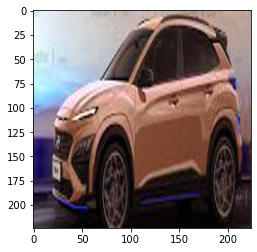

In [22]:
plt.imshow(X[0])

In [23]:
X = np.array(X)
Y = np.array(Y)
# 학습 전용 데이터와 테스트 전용 데이터 구분 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=324)

In [24]:
X_train.shape

(4028, 224, 224, 3)

In [25]:
y_train.shape

(4028, 30)

In [26]:
# normalization
X_train = X_train/255
X_test = X_test/255

In [27]:
# pip install np_utils

In [28]:
X_train.shape

(4028, 224, 224, 3)

In [29]:
X_test.shape

(1007, 224, 224, 3)

In [30]:
y_test.shape

(1007, 30)

In [33]:
# MLP 모델 생성
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [34]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1872682029410746041,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16152002560
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10515114916947967151
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0001:00:00.0, compute capability: 6.0"]

In [38]:
# 손실률: 0.01784898340702057
# 정확도: 0.19923953711986542
    
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Flatten())
#model.add(Dense(units=512, activation='relu'))
model.add(Dense(30, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 43264)            

## Before crop 

In [87]:
# 손실률: 0.020651496946811676
# 정확도: 0.1315789520740509
    
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Flatten())
#model.add(Dense(units=512, activation='relu'))
model.add(Dense(32, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 43264)            

In [86]:
# 손실률: 0.013467477634549141
# 정확도: 0.05197368562221527

model = keras.Sequential()

model.add(Conv2D(filters=64, #units 노드 필터 개수
                kernel_size=(3,3), #필터의 사이즈(홀수)
                padding = 'same', #이미지 사이즈 유지할것인가 'savalid'
                activation = 'relu',
                input_shape = (224,224,3)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
# model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
# model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
# model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
#model.add(Dense(units=512, activation='relu'))
model.add(Dense(32, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 56, 56, 256)      

In [49]:
# 손실률: 0.031076258048415184
# 정확도: 0.09539473801851273
    
model = keras.Sequential()

model.add(Conv2D(filters=512, #units 노드 필터 개수
                kernel_size=(3,3), #필터의 사이즈(홀수)
                padding = 'same', #이미지 사이즈 유지할것인가 'savalid'
                activation = 'relu',
                input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
# model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
# model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
#model.add(Dense(units=512, activation='relu'))
model.add(Dense(32, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 224, 224, 512)     14336     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 112, 112, 512)     0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 112, 112, 256)     1179904   
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 56, 56, 256)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 56, 56, 128)       295040    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 100352)           

In [39]:
# 6. Compile - Optimizer, Loss function 설정
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
# 7. 모델 학습시키기
history = model.fit(X_train, y_train, batch_size=32, epochs=1000, 
                    validation_split=0.2, verbose=2, callbacks=[early_stopping])

Epoch 1/1000
101/101 - 22s - loss: 3.2350 - accuracy: 0.1089 - val_loss: 3.0470 - val_accuracy: 0.1563
Epoch 2/1000
101/101 - 2s - loss: 2.2986 - accuracy: 0.3606 - val_loss: 3.0347 - val_accuracy: 0.2047
Epoch 3/1000
101/101 - 2s - loss: 0.8726 - accuracy: 0.7508 - val_loss: 4.0603 - val_accuracy: 0.2159
Epoch 4/1000
101/101 - 2s - loss: 0.1804 - accuracy: 0.9559 - val_loss: 6.4052 - val_accuracy: 0.2208
Epoch 5/1000
101/101 - 2s - loss: 0.0478 - accuracy: 0.9916 - val_loss: 6.8793 - val_accuracy: 0.2221
Epoch 6/1000
101/101 - 2s - loss: 0.0366 - accuracy: 0.9966 - val_loss: 6.8122 - val_accuracy: 0.2171
Epoch 7/1000
101/101 - 2s - loss: 0.0238 - accuracy: 0.9978 - val_loss: 6.8551 - val_accuracy: 0.2208
Epoch 8/1000
101/101 - 2s - loss: 0.0278 - accuracy: 0.9978 - val_loss: 7.2955 - val_accuracy: 0.2208
Epoch 9/1000
101/101 - 2s - loss: 0.0322 - accuracy: 0.9975 - val_loss: 6.6029 - val_accuracy: 0.2196
Epoch 10/1000
101/101 - 2s - loss: 0.0179 - accuracy: 0.9981 - val_loss: 6.6293 -

In [48]:
car_dir = './class_2nd/test'
categories = os.listdir(car_dir)
categories.remove('.DS_Store')
nb_classes = len(categories)

In [49]:
# 테스트 이미지 데이터 읽어 들이기 
X = []
Y = []
for idx, cat in enumerate(categories):
    # 레이블 지정 
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    # 이미지 
    image_dir = car_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    for i, f in enumerate(files):
        img = Image.open(f) 
        img = img.convert("RGB")  # "L":grayscale로 변환 / "RGB" : RGB로 변환
        img = img.resize((image_w, image_h))
        data = np.asarray(img)      # numpy 배열로 변환
        X.append(data)
        Y.append(label)
        if i % 10 == 0:
            print(i, "\n", data)

0 
 [[[237 235 236]
  [237 235 236]
  [238 236 237]
  ...
  [231 236 229]
  [214 216 213]
  [208 208 208]]

 [[237 235 236]
  [237 235 236]
  [238 236 237]
  ...
  [233 238 231]
  [214 216 213]
  [208 208 208]]

 [[237 235 236]
  [237 235 236]
  [238 236 237]
  ...
  [236 241 234]
  [215 217 214]
  [207 207 207]]

 ...

 [[207 207 207]
  [207 207 207]
  [207 207 207]
  ...
  [200 200 200]
  [200 200 200]
  [200 200 200]]

 [[205 205 205]
  [205 205 205]
  [205 205 205]
  ...
  [200 200 200]
  [201 201 201]
  [201 201 201]]

 [[204 204 204]
  [204 204 204]
  [204 204 204]
  ...
  [200 200 200]
  [201 201 201]
  [201 201 201]]]
10 
 [[[241 242 246]
  [252 253 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [238 238 238]]

 [[241 242 246]
  [252 253 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [238 238 238]]

 [[243 244 247]
  [251 252 254]
  [252 253 254]
  ...
  [255 255 255]
  [255 255 255]
  [238 238 238]]

 ...

 [[239 239 240]
  [252 252 254]
  [255 255 

30 
 [[[ 11  28  44]
  [ 44  61  77]
  [ 40  56  71]
  ...
  [ 49  69  94]
  [ 44  64  88]
  [ 59  77 101]]

 [[ 14  31  47]
  [ 53  70  86]
  [ 39  55  70]
  ...
  [ 48  68  93]
  [ 43  63  87]
  [ 54  72  96]]

 [[ 19  36  52]
  [ 71  88 104]
  [ 37  53  68]
  ...
  [ 47  67  92]
  [ 41  61  85]
  [ 44  62  86]]

 ...

 [[102 128 141]
  [104 127 141]
  [121 143 155]
  ...
  [205 217 232]
  [211 223 238]
  [190 202 216]]

 [[ 95 121 134]
  [109 132 146]
  [151 173 186]
  ...
  [185 197 211]
  [196 208 222]
  [182 194 208]]

 [[ 92 118 131]
  [112 135 149]
  [165 187 200]
  ...
  [175 187 201]
  [189 201 215]
  [178 190 204]]]
0 
 [[[ 49  38  32]
  [ 55  45  38]
  [ 22  14   7]
  ...
  [178 182 191]
  [204 208 217]
  [198 202 211]]

 [[ 49  38  32]
  [ 55  45  38]
  [ 22  14   7]
  ...
  [175 179 188]
  [201 205 214]
  [195 199 208]]

 [[ 49  38  32]
  [ 55  45  38]
  [ 22  14   7]
  ...
  [166 170 179]
  [191 195 204]
  [186 190 199]]

 ...

 [[146 139 130]
  [150 141 134]
  [157 146 

10 
 [[[243 242 248]
  [243 242 248]
  [243 242 248]
  ...
  [243 244 246]
  [243 244 246]
  [243 243 247]]

 [[243 242 248]
  [243 242 248]
  [243 242 248]
  ...
  [243 244 246]
  [243 244 246]
  [243 243 247]]

 [[243 242 248]
  [243 242 248]
  [243 242 248]
  ...
  [243 244 246]
  [243 244 246]
  [243 243 247]]

 ...

 [[244 244 246]
  [244 244 246]
  [244 244 246]
  ...
  [243 244 246]
  [243 244 246]
  [243 243 247]]

 [[243 243 247]
  [243 243 247]
  [243 243 247]
  ...
  [243 244 246]
  [243 244 246]
  [243 243 247]]

 [[243 242 247]
  [243 242 247]
  [243 242 247]
  ...
  [243 244 246]
  [243 244 246]
  [243 243 247]]]
20 
 [[[237 228 219]
  [228 219 210]
  [222 213 204]
  ...
  [ 22  22  10]
  [ 23  23  11]
  [ 23  23  11]]

 [[244 236 227]
  [234 225 216]
  [231 222 213]
  ...
  [ 22  22  11]
  [ 23  23  12]
  [ 23  23  12]]

 [[254 246 237]
  [244 235 226]
  [244 235 226]
  ...
  [ 22  22  12]
  [ 23  23  13]
  [ 23  23  13]]

 ...

 [[247 243 244]
  [247 243 244]
  [246 242

50 
 [[[226 246 253]
  [223 243 250]
  [221 241 248]
  ...
  [ 97  95  96]
  [ 96  94  95]
  [ 96  94  95]]

 [[222 242 249]
  [220 240 247]
  [220 240 247]
  ...
  [ 98  96  97]
  [ 97  95  96]
  [ 97  95  96]]

 [[223 243 250]
  [221 241 248]
  [222 242 249]
  ...
  [100  98  99]
  [ 99  97  98]
  [ 99  97  98]]

 ...

 [[124 122 123]
  [128 126 127]
  [123 121 122]
  ...
  [  2   2   2]
  [  1   1   1]
  [  1   1   1]]

 [[122 120 121]
  [125 123 124]
  [120 118 119]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[120 118 119]
  [123 121 122]
  [118 116 117]
  ...
  [  0   0   0]
  [  1   1   1]
  [  1   1   1]]]
0 
 [[[156 156 156]
  [156 156 156]
  [156 156 156]
  ...
  [119 111 107]
  [115 110 104]
  [115 110 104]]

 [[157 157 157]
  [157 157 157]
  [157 157 157]
  ...
  [119 111 107]
  [115 110 104]
  [115 110 104]]

 [[158 158 158]
  [158 158 158]
  [158 158 158]
  ...
  [119 111 107]
  [114 110 104]
  [115 110 104]]

 ...

 [[150 146 147]
  [149 145 146]
  [148 145 

10 
 [[[142 160 136]
  [142 160 136]
  [143 161 137]
  ...
  [144 183 197]
  [142 184 200]
  [140 184 202]]

 [[142 160 136]
  [142 160 136]
  [143 161 137]
  ...
  [144 183 197]
  [142 184 200]
  [140 184 202]]

 [[142 160 136]
  [142 160 136]
  [143 161 137]
  ...
  [144 183 197]
  [142 184 200]
  [140 184 202]]

 ...

 [[169 181 179]
  [171 182 181]
  [172 183 181]
  ...
  [ 94  92  55]
  [ 94  93  55]
  [101 100  62]]

 [[175 187 185]
  [175 187 185]
  [174 186 184]
  ...
  [ 90  88  49]
  [ 91  89  50]
  [103 101  62]]

 [[177 190 187]
  [177 189 187]
  [175 187 185]
  ...
  [ 89  86  47]
  [ 90  88  48]
  [104 102  62]]]
20 
 [[[213 216 221]
  [213 216 221]
  [213 216 221]
  ...
  [209 203 205]
  [209 203 205]
  [210 204 206]]

 [[213 216 221]
  [213 216 221]
  [213 216 221]
  ...
  [209 203 205]
  [209 203 205]
  [210 204 206]]

 [[213 216 221]
  [213 216 221]
  [213 216 221]
  ...
  [209 203 205]
  [210 204 206]
  [210 204 206]]

 ...

 [[ 31  46  43]
  [ 37  52  49]
  [ 39  54

40 
 [[[125 129 128]
  [140 144 143]
  [156 160 159]
  ...
  [185 143  85]
  [185 142  87]
  [186 143  88]]

 [[124 128 127]
  [140 144 143]
  [155 159 158]
  ...
  [185 143  85]
  [185 142  87]
  [186 143  88]]

 [[124 128 127]
  [141 145 144]
  [155 159 158]
  ...
  [185 143  85]
  [185 142  87]
  [186 143  88]]

 ...

 [[148 157 166]
  [142 152 161]
  [141 151 160]
  ...
  [ 90 102 112]
  [ 80  93 102]
  [ 79  92 102]]

 [[154 163 172]
  [142 152 161]
  [147 157 166]
  ...
  [109 121 133]
  [113 125 137]
  [115 127 138]]

 [[157 167 176]
  [143 153 162]
  [151 161 170]
  ...
  [123 135 148]
  [135 147 159]
  [138 150 163]]]
0 
 [[[194 183 179]
  [194 183 179]
  [193 182 178]
  ...
  [215 204 202]
  [214 203 201]
  [208 197 195]]

 [[194 183 179]
  [194 183 179]
  [193 182 178]
  ...
  [215 204 202]
  [214 203 201]
  [208 197 195]]

 [[194 183 179]
  [194 183 179]
  [193 182 178]
  ...
  [215 204 202]
  [214 203 201]
  [208 197 195]]

 ...

 [[164 158 158]
  [163 157 157]
  [162 156 

40 
 [[[149 162 168]
  [150 163 169]
  [151 164 170]
  ...
  [161 172 178]
  [162 169 177]
  [162 169 177]]

 [[149 162 168]
  [150 163 169]
  [151 164 170]
  ...
  [161 172 178]
  [162 169 177]
  [162 169 177]]

 [[150 163 169]
  [150 163 169]
  [151 164 170]
  ...
  [161 172 178]
  [162 169 177]
  [162 169 177]]

 ...

 [[118 135 142]
  [119 136 143]
  [119 136 143]
  ...
  [124 138 147]
  [125 139 148]
  [125 139 148]]

 [[118 135 142]
  [119 136 143]
  [119 136 143]
  ...
  [124 138 147]
  [125 139 148]
  [125 139 148]]

 [[118 135 142]
  [119 136 143]
  [119 136 143]
  ...
  [124 138 147]
  [125 139 148]
  [125 139 148]]]
0 
 [[[155 156 158]
  [155 156 158]
  [155 156 158]
  ...
  [158 158 159]
  [159 159 161]
  [159 159 161]]

 [[155 156 158]
  [155 156 158]
  [155 156 158]
  ...
  [158 158 159]
  [159 159 161]
  [159 159 161]]

 [[155 156 158]
  [155 156 158]
  [154 155 157]
  ...
  [158 158 159]
  [159 159 161]
  [159 159 161]]

 ...

 [[165 174 173]
  [165 174 173]
  [165 174 

20 
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[253 253 253]
  [254 254 254]
  [254 254 254]
  ...
  [226 226 226]
  [227 227 227]
  [227 227 227]]

 [[253 253 253]
  [254 254 254]
  [254 254 254]
  ...
  [226 226 226]
  [227 227 227]
  [227 227 227]]

 [[253 253 253]
  [254 254 254]
  [255 255 255]
  ...
  [226 226 226]
  [227 227 227]
  [227 227 227]]]
30 
 [[[ 97  93  92]
  [102 100  98]
  [106 105 104]
  ...
  [ 49  39  35]
  [ 46  34  30]
  [ 45  30  27]]

 [[117 113 112]
  [116 114 112]
  [110 109 108]
  ...
  [ 42  37  35]
  [ 43  38  35]
  [ 45  39  36]]

 [[129 126 124]
  [128 126 123]
  [122 121 118]
  ...
  [ 33  38  37]
  [ 38  43  43]
  [ 42  49  48]]

 ...

 [[125 129 128]
  [125 129 128]
  [122 126

20 
 [[[174 181 184]
  [176 182 183]
  [157 162 156]
  ...
  [165 166 157]
  [230 232 220]
  [200 202 188]]

 [[171 179 182]
  [173 178 180]
  [160 166 161]
  ...
  [178 179 170]
  [200 201 190]
  [152 153 139]]

 [[162 169 173]
  [166 171 173]
  [165 171 168]
  ...
  [200 200 191]
  [186 186 174]
  [124 125 111]]

 ...

 [[163 185 193]
  [175 189 197]
  [190 189 199]
  ...
  [210 207 195]
  [219 213 202]
  [226 219 209]]

 [[162 183 200]
  [173 186 201]
  [187 185 196]
  ...
  [206 202 191]
  [213 208 197]
  [221 213 203]]

 [[163 184 208]
  [175 186 207]
  [188 183 197]
  ...
  [206 202 191]
  [211 206 195]
  [217 209 199]]]
30 
 [[[89 89 89]
  [89 89 89]
  [89 89 89]
  ...
  [89 89 89]
  [89 89 89]
  [89 89 89]]

 [[89 89 89]
  [89 89 89]
  [89 89 89]
  ...
  [89 89 89]
  [89 89 89]
  [89 89 89]]

 [[89 89 89]
  [89 89 89]
  [89 89 89]
  ...
  [89 89 89]
  [89 89 89]
  [89 89 89]]

 ...

 [[46 46 46]
  [46 46 46]
  [46 46 46]
  ...
  [46 46 46]
  [46 46 46]
  [46 46 46]]

 [[46 46 4

In [50]:
# normalization
X = np.array(X)
Y = np.array(Y)
X = X/255
Y = Y/255

In [51]:
# 8. 모델 평가하기 filters=128(3,3) Conv2D(64,(3,3) Dense(units=512, activation='relu')
loss, acc = model.evaluate(X, Y, batch_size=16)  # 학습 완료 후 검증
print("손실률:", loss)  
print("정확도:", acc)

76/76 [==============================] - 1s 7ms/step - loss: 0.0243 - accuracy: 0.2533
손실률: 0.024342291057109833
정확도: 0.25331124663352966


## 자른거 grayscale

In [26]:
# 8. 모델 평가하기 filters=128(3,3) Conv2D(64,(3,3) Dense(units=512, activation='relu')
loss, acc = model.evaluate(X_test, y_test, batch_size=16)  # 학습 완료 후 검증
print("손실률:", loss)  
print("정확도:", acc)

77/77 [==============================] - 2s 30ms/step - loss: 3.4350 - accuracy: 0.0528
손실률: 3.435025215148926
정확도: 0.05284553021192551


## 자른거

In [27]:
# 8. 모델 평가하기 filters=128(3,3) Conv2D(64,(3,3) Dense(units=512, activation='relu')
loss, acc = model.evaluate(X_test, y_test, batch_size=16)  # 학습 완료 후 검증
print("손실률:", loss)  
print("정확도:", acc)

77/77 [==============================] - 2s 30ms/step - loss: 3.4350 - accuracy: 0.0528
손실률: 3.435025215148926
정확도: 0.05284553021192551


In [28]:
# 8. 모델 평가하기 filters=128(3,3) Conv2D(64,(3,3) Dense(units=512, activation='relu')
loss, acc = model.evaluate(X_test, y_test, batch_size=16)  # 학습 완료 후 검증
print("손실률:", loss)  
print("정확도:", acc)

77/77 [==============================] - 2s 30ms/step - loss: 3.4350 - accuracy: 0.0528
손실률: 3.435025215148926
정확도: 0.05284553021192551


In [29]:
# 8. 모델 평가하기 filters=128(3,3) Conv2D(64,(3,3) Dense(units=512, activation='relu')
loss, acc = model.evaluate(X_test, y_test, batch_size=30)  # 학습 완료 후 검증
print("손실률:", loss)  
print("정확도:", acc)

41/41 [==============================] - 5s 54ms/step - loss: 3.4350 - accuracy: 0.0528
손실률: 3.435025691986084
정확도: 0.05284553021192551
